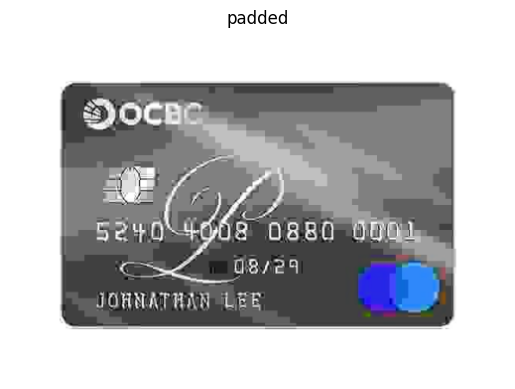

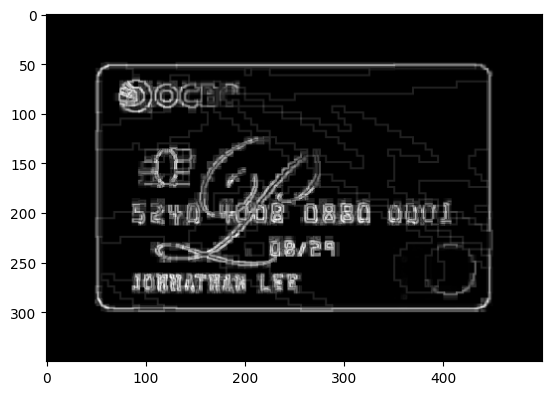

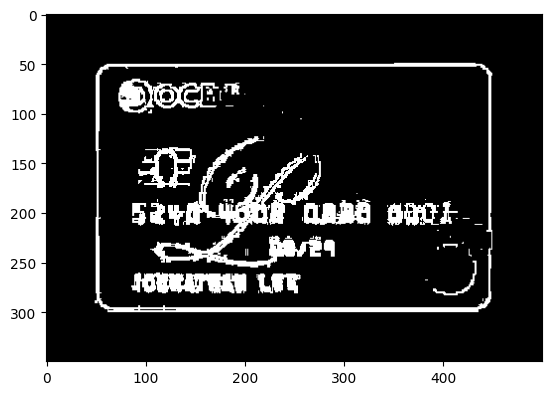

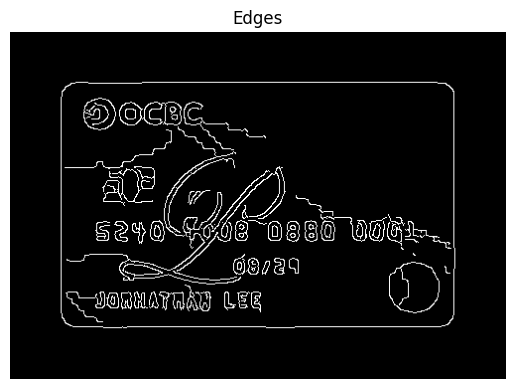

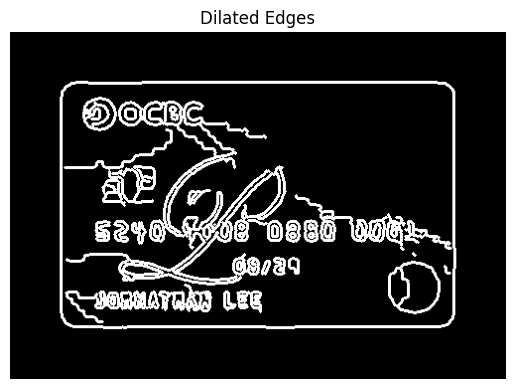

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import math
# Load the image
def showImage(name, image, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')  # Hide axis
    plt.title(name)
    plt.show()
def resize_image(img, target_width):
    # Read the image
    
    if img is None:
        print("Error: Image not found or unable to load.")
        return
    
    # Get the original dimensions
    height, width = img.shape[:2]
    
    # Calculate the new height to maintain the aspect ratio
    width_percent = (target_width / float(width))
    new_height = int((float(height) * float(width_percent)))
    
    # Resize the image
    new_img = cv2.resize(img, (target_width, new_height), interpolation=cv2.INTER_AREA)
    
    # Save the resized image
    return new_img

# image = cv2.imread('01 - Straightforward.jpg')
# image = cv2.imread('02 - You can do it.jpg')
# image = cv2.imread('03 - Should be okay.jpg')
# image = cv2.imread('04 - Still ok, I hope.jpg')
# image = cv2.imread('05 - Looks cool, hope it runs cool too.jpg')
# image = cv2.imread('06 - Hatetlewe7 hatlewe7.jpg')
# image = cv2.imread('08 - Ew3a soba3ak ya3am.jpg')
# image = cv2.imread('09 - El spero spathis we23et 3aaaa.jpg')
# image = cv2.imread('10 - Mal7 w Felfel.jpg')
# image = cv2.imread('11 - Ya setty ew3i.jpg')
# image = cv2.imread('12 - weewooweewoo.jpg')
# image = cv2.imread('13 - Matozbot el camera ya Kimo.jpg')
# image = cv2.imread('14 - 2el noor 2ata3.jpg')
image = cv2.imread('15 - Compresso Espresso.jpg')
# image = cv2.imread('16 - Sheel el kart yastaaaa.jpg')
# image = cv2.imread('07 - Hatet3eweg hat3eweg.jpg')


image=resize_image(image,400)
# Get the color of the top-left pixel
# Get the color of the top-left pixel and convert it to a tuple
# Get the color of the top-left pixel
top_left_pixel = image[0, 0]

# Convert to a tuple of integers
top_left_pixel = tuple(map(int, top_left_pixel))

# Define the padding size
pad_size = 50  # You can change this to the desired padding size

# Pad the image with the top-left pixel color
padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, 
                                  cv2.BORDER_CONSTANT, value=top_left_pixel)
showImage("padded",padded_image)

gray = cv2.cvtColor(padded_image, cv2.COLOR_BGR2GRAY)

kernel_size = (3,3)  # Width and height of the rectangle
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

# Perform dilation
dilated_image = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
plt.imshow(dilated_image, cmap="gray")
plt.show()

thresh2 = cv2.threshold(dilated_image, 60, 170, cv2.THRESH_BINARY)[1]
plt.imshow(thresh2, cmap="gray")
plt.show()

# Preprocess the image
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
blurred = cv2.GaussianBlur(gray, (9, 9), 0)#9x0

# Apply Canny edge detector
edges = cv2.Canny(blurred, 10, 110)

# Define a rectangular kernel for dilation
kernel_size = (3, 3)  # Adjust the size as needed
rectangular_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, kernel_size)

# Apply dilation with the rectangular kernel
dilated_edges = cv2.dilate(edges, rectangular_kernel, iterations=1)


showImage("Edges", edges, cmap='gray')
# Display the dilated edges
showImage("Dilated Edges", dilated_edges, cmap='gray')



In [2]:

# Define parameters for Hough Line Transform
rho = 1  # Distance resolution in pixels of the Hough grid
theta = np.pi / 180  # Angular resolution in radians of the Hough grid
threshold = 20  # Minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # Minimum number of pixels making up a line
max_line_gap = 3  # Maximum gap in pixels between connectable line segments
line_image = np.copy(dilated_edges) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

# for line in lines:
#     for x1,y1,x2,y2 in line:
#         cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),1)

# Function to calculate line length
def line_length(line):
    x1, y1, x2, y2 = line
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Calculate lengths of all lines
line_lengths = [(line, line_length(line[0])) for line in lines]

# Sort lines based on their lengths (longest first)
line_lengths.sort(key=lambda x: x[1], reverse=True)

# Select the first 4 lines
top_lines = [line for line, length in line_lengths[:4]]

# Calculate the length of the 4th longest line to compare against
length_threshold = line_lengths[3][1] * 0.5  # Example threshold: 50% of the 4th longest line

# Filter out lines that are significantly shorter than the 4th longest line
filtered_lines = [line for line, length in line_lengths if length >= length_threshold]

# Convert lines to the desired format
formatted_lines = [((line[0][0], line[0][1]), (line[0][2], line[0][3])) for line in filtered_lines]

print(formatted_lines)

# Draw the filtered lines on the blank image
for line in formatted_lines:
    (x1, y1), (x2, y2) = line  # Unpack line correctly
    cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 1)


[((133, 51), (430, 51)), ((51, 283), (51, 66)), ((447, 217), (447, 60)), ((118, 297), (257, 297))]


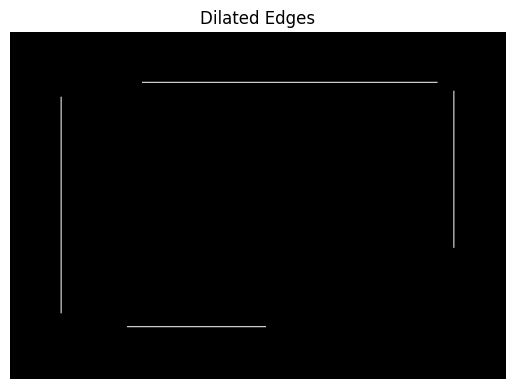

In [3]:
# Draw the lines on the  image
lines_edges = cv2.addWeighted(dilated_edges, 0.8, line_image, 1, 0)
showImage("Dilated Edges", line_image, cmap='gray')


Extended lines: [((0, 51), (500, 51)), ((51, 0), (51, 350)), ((447, 0), (447, 350)), ((0, 297), (500, 297))]


C:\Users\Mohamed Amr\AppData\Local\Temp\ipykernel_24412\872576534.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  x_top = (0 - intercept) / slope
C:\Users\Mohamed Amr\AppData\Local\Temp\ipykernel_24412\872576534.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  x_bottom = (height - intercept) / slope


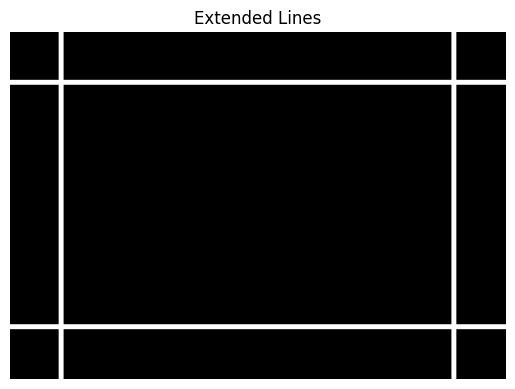

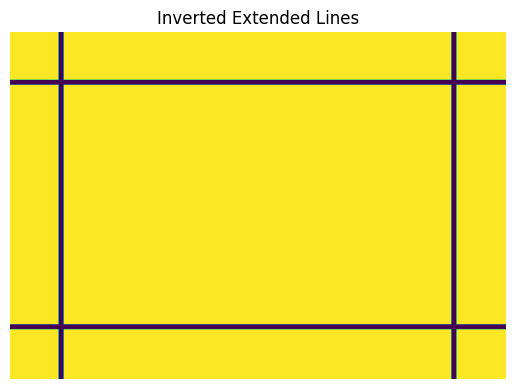

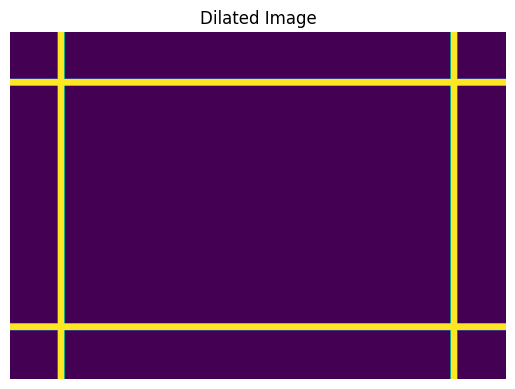

In [4]:
import cv2
import numpy as np

def extend_line(x1, y1, x2, y2, img_shape):
    """Extend a line segment to the borders of the image."""
    height, width = img_shape[:2]
    dx = x2 - x1
    dy = y2 - y1

    if dx == 0:
        return [(x1, 0), (x1, height)]
    
    slope = dy / dx
    intercept = y1 - slope * x1

    def get_line_endpoints():
        endpoints = []
        x_top = (0 - intercept) / slope
        if 0 <= x_top < width:
            endpoints.append((int(x_top), 0))

        x_bottom = (height - intercept) / slope
        if 0 <= x_bottom < width:
            endpoints.append((int(x_bottom), height))

        y_left = intercept
        if 0 <= y_left < height:
            endpoints.append((0, int(y_left)))

        y_right = slope * width + intercept
        if 0 <= y_right < height:
            endpoints.append((width, int(y_right)))

        return endpoints

    endpoints = get_line_endpoints()
    if len(endpoints) == 2:
        return endpoints
    else:
        return []

# Create a new image for the extended lines
extended_line_image = np.copy(dilated_edges) * 0

# List to store extended lines
extended_lines = []

# Extend each detected line segment to the image borders
for line in formatted_lines:
    (x1, y1), (x2, y2) = line  # Correct unpacking for the format
    extended_points = extend_line(x1, y1, x2, y2, dilated_edges.shape)
    if len(extended_points) == 2:
        (x1_new, y1_new), (x2_new, y2_new) = extended_points
        extended_lines.append(((x1_new, y1_new), (x2_new, y2_new)))
        cv2.line(extended_line_image, (x1_new, y1_new), (x2_new, y2_new), (255, 0, 0), 3)

print("Extended lines:", extended_lines)

# Overlay the extended lines on the original image
lines_edges = cv2.addWeighted(dilated_edges, 0.8, extended_line_image, 1, 0)

# Function to show images (assuming you have it defined)
showImage("Extended Lines", extended_line_image, cmap='gray')

def draw_lines_on_black_image(lines, img_shape, color=(0, 255, 0), thickness=2):
    """Draw lines on a black background image."""
    # Create a black image
    black_image = np.zeros((img_shape[0], img_shape[1], 3), dtype=np.uint8)
    
    # Draw each line on the black image
    for (x1, y1), (x2, y2) in lines:
        cv2.line(black_image, (x1, y1), (x2, y2), color, thickness)
    
    return black_image

# Invert the extended line image
_, extended_line_image_inv = cv2.threshold(extended_line_image, 127, 255, cv2.THRESH_BINARY_INV)
showImage("Inverted Extended Lines", extended_line_image_inv)

kernelbig = np.ones((3, 3), np.uint8)

# Apply dilation (not erosion as your comment suggests)
eroded_image = cv2.dilate(extended_line_image, kernelbig, iterations=1)
showImage("Dilated Image", eroded_image)


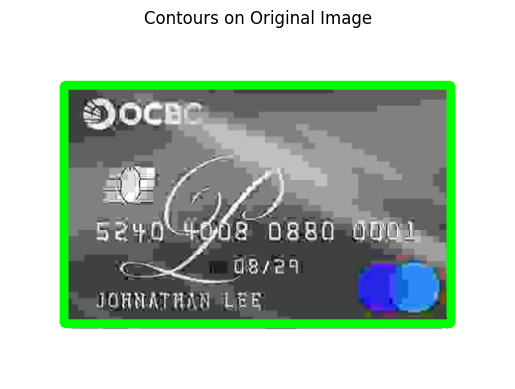

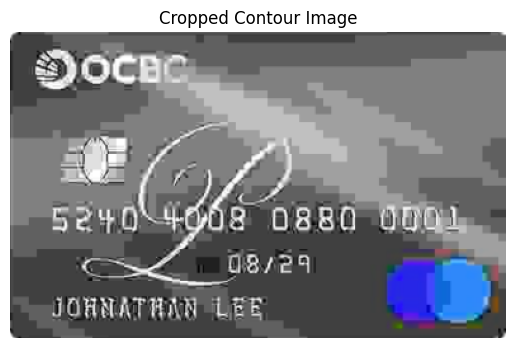

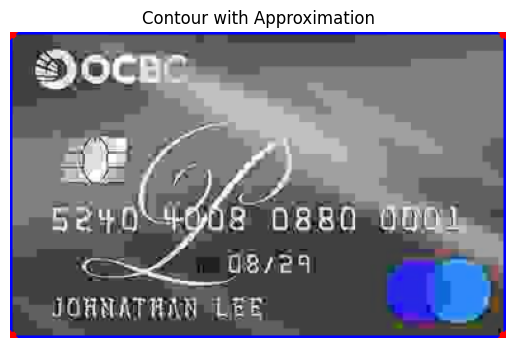

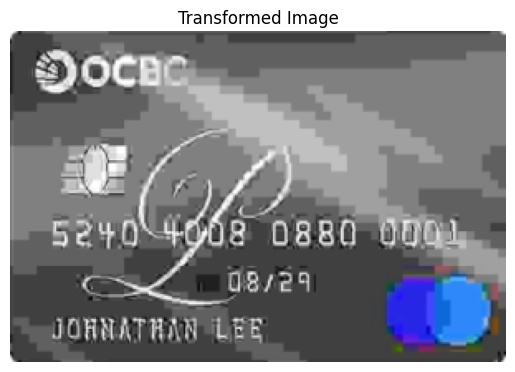

In [5]:
inverted_image = cv2.bitwise_not(extended_line_image)
def find_contours(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
    if len(sorted_contours) > 0:
        return sorted_contours[0]
    else:
        print("No contours found.")
        return None

def draw_contours_on_image(contour, image):
    if contour is not None:
        image_with_contours = image.copy()
        cv2.drawContours(image_with_contours, [contour], -1, (0, 255, 0), 7)
        return image_with_contours
    else:
        return image

def crop_contour_from_image(image, contour):
    if contour is not None:
        mask = np.zeros(image.shape[:2], dtype=np.uint8)
        cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
        result = cv2.bitwise_and(image, image, mask=mask)
        x, y, w, h = cv2.boundingRect(contour)
        cropped_contour_image = result[y:y+h, x:x+w]
        return cropped_contour_image, (x, y, w, h)
    else:
        return image, None

def approximate_and_draw_contour(cropped_image, contour, rect):
    if contour is not None:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        
        if len(approx) > 0:
            # Adjust approximation points based on the cropping rectangle
            approx = np.array([[pt[0][0] - rect[0], pt[0][1] - rect[1]] for pt in approx])
            
            # Draw the approximated contour on the cropped image
            contour_image = cropped_image.copy()
            cv2.drawContours(contour_image, [approx], -1, (0, 0, 255), 2)  # Red color in BGR
            
            # Draw the points of the approximated contour
            for point in approx:
                cv2.circle(contour_image, tuple(point), 5, (255, 0, 0), -1)  # Blue color in BGR
            
            return contour_image, approx
        else:
            return cropped_image, None
    else:
        return cropped_image, None

def perspective_transform(image, points, dst_size=(300, 200)):
    if len(points) == 4:
        # Ensure points are in the correct order: top-left, top-right, bottom-right, bottom-left
        rect = order_points(points)
        
        # Define the destination points
        width, height = dst_size
        pts2 = np.array([
            [0, 0],
            [width - 1, 0],
            [width - 1, height - 1],
            [0, height - 1]
        ], dtype='float32')

        # Compute the perspective transform matrix
        matrix = cv2.getPerspectiveTransform(rect, pts2)

        # Apply the perspective transform
        transformed_image = cv2.warpPerspective(image, matrix, (width, height))
        return transformed_image
    else:
        print("Not enough points for perspective transformation.")
        return image

def order_points(points):
    # Order points in the correct sequence: top-left, top-right, bottom-right, bottom-left
    rect = np.zeros((4, 2), dtype='float32')

    s = points.sum(axis=1)
    rect[0] = points[np.argmin(s)]  # top-left
    rect[2] = points[np.argmax(s)]  # bottom-right

    diff = np.diff(points, axis=1)
    rect[1] = points[np.argmin(diff)]  # top-right
    rect[3] = points[np.argmax(diff)]  # bottom-left

    return rect

# Assuming 'inverted_image' and 'original_image' are defined earlier in your code
largest_contour = find_contours(inverted_image)
cropped_contour_image, rect = crop_contour_from_image(padded_image, largest_contour)
contour_with_approx, approx_points = approximate_and_draw_contour(cropped_contour_image, largest_contour, rect)

if approx_points is not None and len(approx_points) >= 4:
    # Ensure we have 4 points for perspective transformation
    pts = np.array(approx_points[:4], dtype='float32')
    transformed_image = perspective_transform(cropped_contour_image, pts)

    # Display results
    showImage("Contours on Original Image", draw_contours_on_image(largest_contour, padded_image))
    showImage("Cropped Contour Image", cropped_contour_image)
    showImage("Contour with Approximation", contour_with_approx)
    showImage("Transformed Image", transformed_image)
else:
    print("Insufficient points for perspective transformation.")